<a href="https://colab.research.google.com/github/dt2229/bias_in_publications/blob/bhavna/Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import re
import numpy as np
import nltk
from glove import Corpus, Glove
from nltk.tokenize import sent_tokenize, word_tokenize
from multiprocessing import Pool
from scipy import spatial
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 974 kB 3.2 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')
NYT_sample = open("/content/drive/My Drive/NLP Project Space/NYT.csv")
NYT = NYT_sample.read()
Fox_sample = open("/content/drive/My Drive/NLP Project Space/Fox.csv")
Fox = Fox_sample.read()
CNN_sample = open("/content/drive/My Drive/NLP Project Space/cnn.csv")
CNN = CNN_sample.read()

Mounted at /content/drive


In [5]:
nltk.download('punkt')
n = NYT.replace("\n", " ")
NYT_data = []
for i in sent_tokenize(n):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    NYT_data.append(temp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
n = Fox.replace("\n", " ")
Fox_data = []
for i in sent_tokenize(n):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    Fox_data.append(temp)

In [7]:
n = CNN.replace("\n", " ")
CNN_data = []
for i in sent_tokenize(n):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    CNN_data.append(temp)

In [8]:
for i in range(len(NYT_data)):
    NYT_data[i] = [word.lower() for word in NYT_data[i] if re.match('^[a-zA-Z]+', word)]  

In [9]:
for i in range(len(Fox_data)):
    Fox_data[i] = [word.lower() for word in Fox_data[i] if re.match('^[a-zA-Z]+', word)]  

In [10]:
for i in range(len(CNN_data)):
    CNN_data[i] = [word.lower() for word in CNN_data[i] if re.match('^[a-zA-Z]+', word)]  

In [11]:
corpus = Corpus()
corpus.fit(Fox_data, window = 3)
glove = Glove(no_components = 100, learning_rate = 0.1)
glove.fit(matrix = corpus.matrix, epochs = 30, no_threads = Pool()._processes, verbose = True)

Performing 30 training epochs with 2 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [12]:
glove.add_dictionary(corpus.dictionary)

In [13]:
glove.save('glove_model')

In [14]:
glove.load('glove_model')

In [15]:
import random
from random import randint
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA

In [107]:
woman_sim = glove.most_similar('woman', number = 50)
man_sim = glove.most_similar('man', number = 50)
df = pd.DataFrame(woman_sim)
#df.head(4)

In [17]:
def vector_converter(word):
    idx = glove.dictionary[word]
    return glove.word_vectors[idx]

In [18]:
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [19]:
def pair_sim(pair):
  v1 = vector_converter(pair[0])
  v2 = vector_converter(pair[1])
  sim = cosine_similarity(v1,v2)
  return sim

In [20]:
v1 = vector_converter('woman')
v2 = vector_converter('man')
cosine_similarity(v1, v2)

0.9139835568483821

In [21]:
def glove_analogy(word_a, word_b, word_c):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors. 
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """
    
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    e_a, e_b, e_c = vector_converter(word_a), vector_converter(word_b), vector_converter(word_c)
    
    words = corpus.dictionary
    max_cosine_sim = -100              
    best_word = None                   
    for w in words:        
        if w in [word_a, word_b, word_c] :
            continue
        
 
        cosine_sim = cosine_similarity(e_b - e_a, vector_converter(w) - e_c)
        
 
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        
    return best_word

In [27]:
triad=['woman', 'love', 'man']
print ('{} -> {} : {} -> {}'.format(triad[0],triad[1],triad[2], glove_analogy(triad[0],triad[1],triad[2])))

woman -> love : man -> make


In [42]:
pip install TSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 547 kB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for TSNE: filename=tsne-0.3.1-cp38-cp38-linux_x86_64.whl size=266977 sha256=97482130a67a138ecb17ee013e71e6bb8744a747cba4d6fa2e449dff8b2ad911
  Stored in directory: /root/.cache/pip/wheels/ea/70/92/ebfbfd78f6757150d590c73fb65e8a14c5e0ee58f8c1f0654f
Successfully built TSNE


In [43]:
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [117]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words =  list(corpus.dictionary.keys())
words_no_sw = [word for word in words if not word in stopwords.words()]
vectors = [vector_converter(word) for word in words_no_sw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
len(vectors)

4200

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


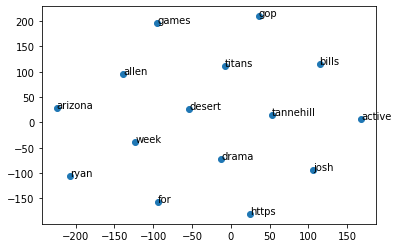

In [119]:
Y = tsne.fit_transform(vectors[:15])
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

In [38]:
from sklearn.decomposition import PCA

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )

In [ ]:
labels = gendered_stuff + occupations
data = [model_cbow_Fox[w] for w in labels]
plot_data(data, labels)

In [95]:
simlex999 = pd.read_csv("/content/drive/My Drive/NLP Project Space/simlex999.csv").iloc[:,0:3]
simlex999.head(10)

,word 1,word 2,score
0,old,new,0.000000
1,smart,intelligent,9.769231
2,hard,difficult,9.692308
3,happy,cheerful,9.307692
4,hard,easy,0.000000
5,fast,rapid,9.846154
6,happy,glad,9.384615
7,short,long,0.000000
8,stupid,dumb,9.076923
9,weird,strange,9.692308


In [101]:
pair_sim(['hard','easy'])

0.5572858736983871

In [26]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def cloud(c):
  wordcloud = WordCloud(max_font_size=50, max_words=100,collocations=False).generate_from_frequencies(c)
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

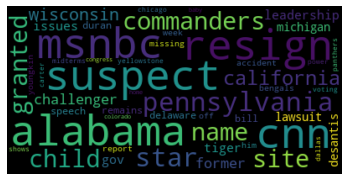

In [176]:
words=dict(man_sim)
cloud(words)